## Chronic Kidney Disease

Chronic Kidney Disease (CKD) or Chronic Kidney Failure is a common kidney disease that 
leads to kidney failure. Despite improvements in treatment and surgery, chronic kidney disease
remains a health concern. Researchers from all over the world are interested in developing
high-performance methods for diagnosis, treatment, and preventive therapy, owing to DK 's
growth in the recent past. Learning the aspects relevant to addressing CKD can dea  to
improved performance. Clinical examination along with analysis of medical data of patients can
help to predict the ailment at an early stage. Despite the prevalence of methods to build
intelligent systems to predict CKD by analyzing health data, their performance stil  needs
enhancement.
This Project will propose an intelligent classification and prediction model that dims to  evelop a
finer model to predict the disease. It will use a modified Deep Belief NBtwork (D N) as the
classification algorithm to predict chronic kidney disease. It uses Softmax as an activation
function, and the Categorical Cross-entropy as a loss function. The evatuation of  he model to
be proposed will show that the model can predict CKD with an accuracy of 98.5% an  sensitivity
of 87.5% compared with other existing models that involve the usage of techniq es like Naive
Bayes, MLP, KNN, Decision Trees, and the Support Vector Machine. Analysis of  he result will
prove that using advanced deep learning techniques iill be benefic al for clinical
decision-making and would aid in the prediction of CKD in the easly stage and it  related factors
that reduce the progr diseases..tion strategies.

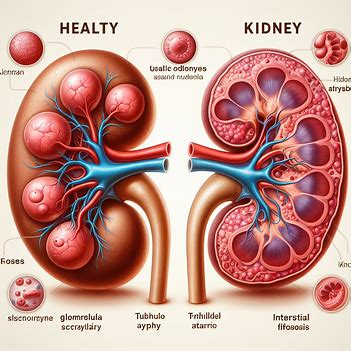
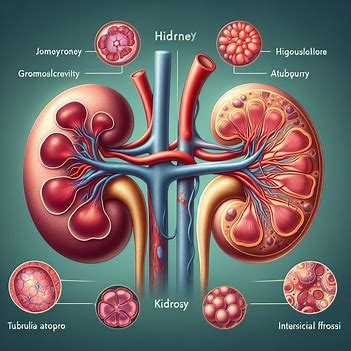

# 1. Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import tensorflow as tf
import keras
from keras import Sequential, layers
from keras.layers import Dense, Activation

from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score, recall_score, f1_score

from joblib import dump

# 2. Data Collection

In [2]:
# Loading the Dataset
url = "https://raw.githubusercontent.com/TarunThothadriV/chronic-kidney-disease-dbn/main/ckd.csv"
ckd_data = pd.read_csv(url,index_col = 0)

In [3]:
# Printing first 5 rows
ckd_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# Printing last 5 rows
ckd_data.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53,6800,6.1,no,no,no,good,no,no,notckd


# 3. Data Understanding

In [5]:
# Understanding the shape of the dataset
rows, cols = ckd_data.shape
print(f"Rows : {rows}\nColumns : {cols}")

Rows : 400
Columns : 25


In [6]:
# 7 summary statistics
ckd_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000
pot,312.0,4.627244,3.193904,2.500,3.80,4.40,4.90,47.000


In [7]:
# Dtype and null values count
ckd_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    object 


In [8]:
# Classification Distribution
ckd_data["classification"].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [9]:
# No of unique values in each feature
ckd_data.nunique()

age                76
bp                 10
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               146
bu                118
sc                 84
sod                34
pot                40
hemo              115
pcv                44
wc                 92
rc                 49
htn                 2
dm                  5
cad                 3
appet               2
pe                  2
ane                 2
classification      3
dtype: int64

In [10]:
# Missing Values Count
ckd_data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

# 4. Feature Engineering

In [11]:
# Observing unique values in each column
for col in ckd_data.columns:
  print(f"Unique values in {col} : \n",ckd_data[col].unique(),"\n\n......................................................................\n")

Unique values in age : 
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 

......................................................................

Unique values in bp : 
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 

......................................................................

Unique values in sg : 
 [1.02  1.01  1.005 1.015   nan 1.025] 

......................................................................

Unique values in al : 
 [ 1.  4.  2.  3.  0. nan  5.] 

......................................................................

Unique values in su : 
 [ 0.  3.  4.  1. nan  2.  5.] 

......................................................................

Unique values in rbc : 
 [nan 'normal' '

Observation : There are many values with '\t' in it. It should be removed from those values

In [12]:
# Replacing "\t" with empty space and nan
ckd_data['pcv'] = ckd_data['pcv'].replace(to_replace = {'\t?' : np.nan, '\t43' : '43'})

ckd_data['wc'] = ckd_data['wc'].replace(to_replace = {'\t?' : np.nan,'\t8400':'8400', '\t6200':'6200'})

ckd_data['rc'] = ckd_data['rc'].replace(to_replace = {'\t?' : np.nan})

ckd_data['dm'] = ckd_data['dm'].replace(to_replace = {'\tno' : 'no', '\tyes' : 'yes',' yes': 'yes'})

ckd_data['cad'] = ckd_data['cad'].replace(to_replace = {'\tno' : 'no'})

ckd_data['classification'] = ckd_data['classification'].replace(to_replace = {'ckd\t' : 'ckd'})

In [13]:
# Re-observing unique values in each column
for col in ckd_data.columns:
  print(f"Unique values in {col} : \n",ckd_data[col].unique(),"\n\n......................................................................\n")

Unique values in age : 
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] 

......................................................................

Unique values in bp : 
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] 

......................................................................

Unique values in sg : 
 [1.02  1.01  1.005 1.015   nan 1.025] 

......................................................................

Unique values in al : 
 [ 1.  4.  2.  3.  0. nan  5.] 

......................................................................

Unique values in su : 
 [ 0.  3.  4.  1. nan  2.  5.] 

......................................................................

Unique values in rbc : 
 [nan 'normal' '

Observation :

The following features should have float/int as dtype but it is of object dtype. Thus, we should manually change the dtype:


1.   pcv
2.   wc
3.   rc
4.   age

The following features should have float/int as dtype but it is of object dtype. Thus, we should manually change the dtype:



1.   sg
2.   al
3.   su



In [14]:
# Checking the data types
ckd_data.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [15]:
# Changing the dtype
ckd_data[['age', 'wc', 'pcv']] = ckd_data[['age', 'wc', 'pcv']].astype('Int64')
ckd_data['rc'] = ckd_data['rc'].astype('float64')
ckd_data[['al','sg','su']] = ckd_data[['al','sg','su']].astype('str')
ckd_data[['sg', 'al', 'su']] = ckd_data[['sg', 'al', 'su']].replace(to_replace = {'nan' : np.nan})
ckd_data.dtypes

age                 Int64
bp                float64
sg                 object
al                 object
su                 object
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 Int64
wc                  Int64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

# 5. Missing Values Imputation

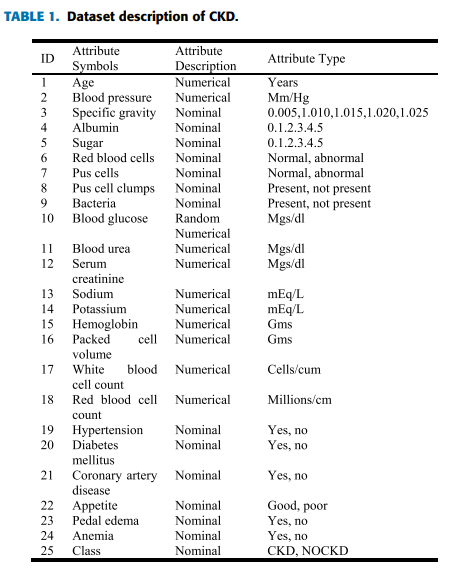

In [16]:
# Number of numerical and nominal features

nominal   = [col for col in ckd_data.columns if ckd_data[col].dtype == 'O']
numerical = [col for col in ckd_data.columns if ckd_data[col].dtype != 'O']

print(f"Number of numerical features : {len(numerical)}\nNumerical Columns : {numerical}\n")
print(f"Number of nominal features : {len(nominal)}\nNominal Columns : {nominal}\n")

Number of numerical features : 11
Numerical Columns : ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

Number of nominal features : 14
Nominal Columns : ['sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']



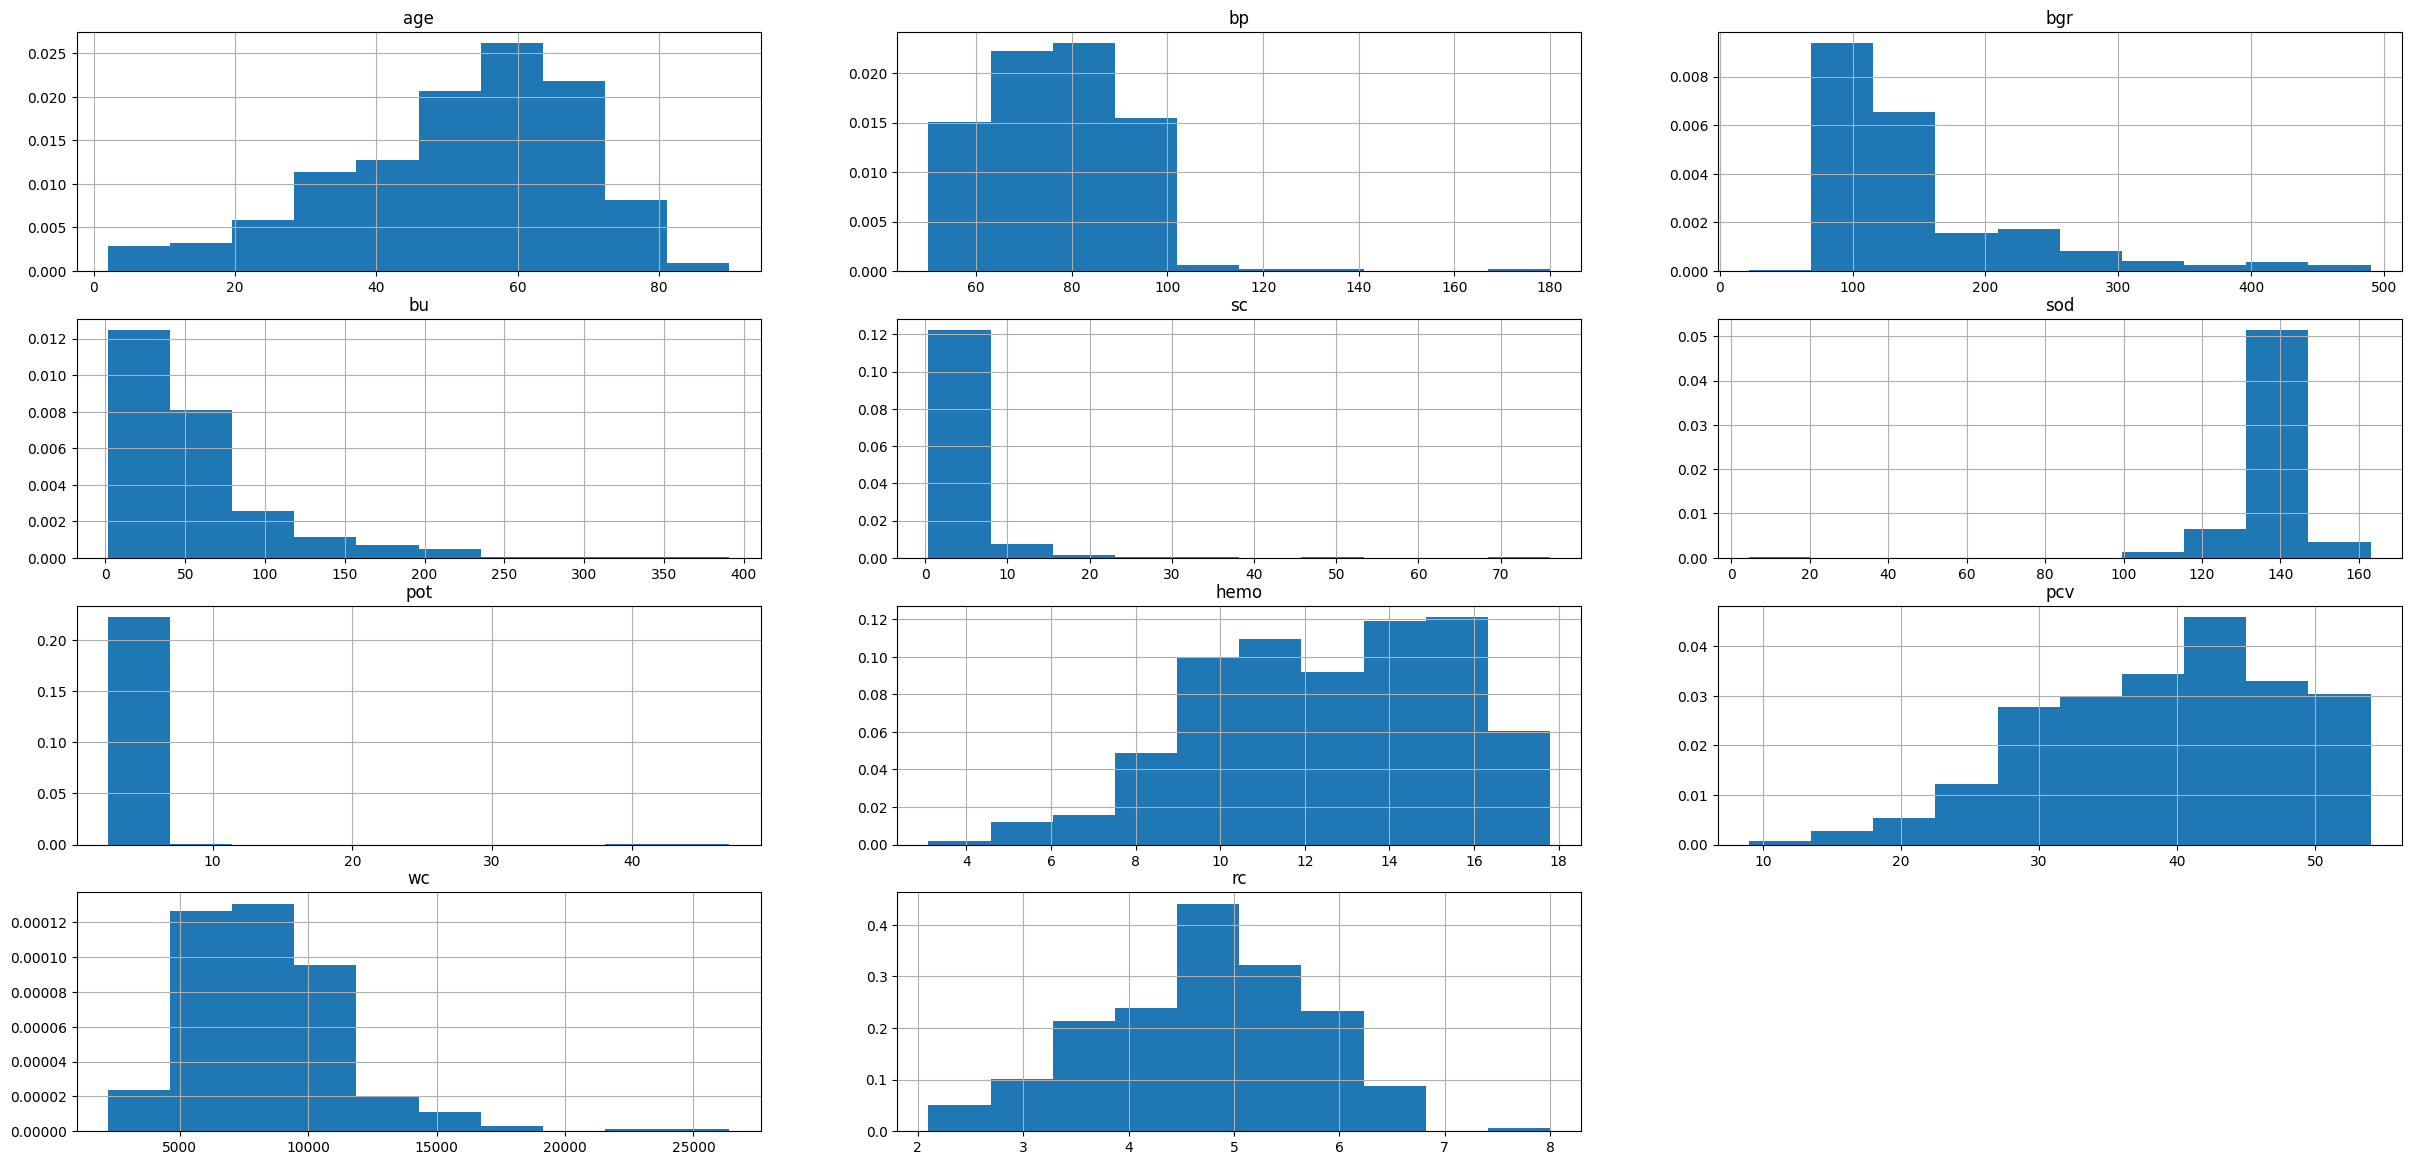

In [17]:
# Density Plots for numerical features before imputation
plt.figure(figsize=(30,18))
for id,col in enumerate(numerical):
  plt.subplot(5,3,id+1) # 5 rows & 3 columns
  ckd_data[col].hist(density = True)
  plt.title(col)

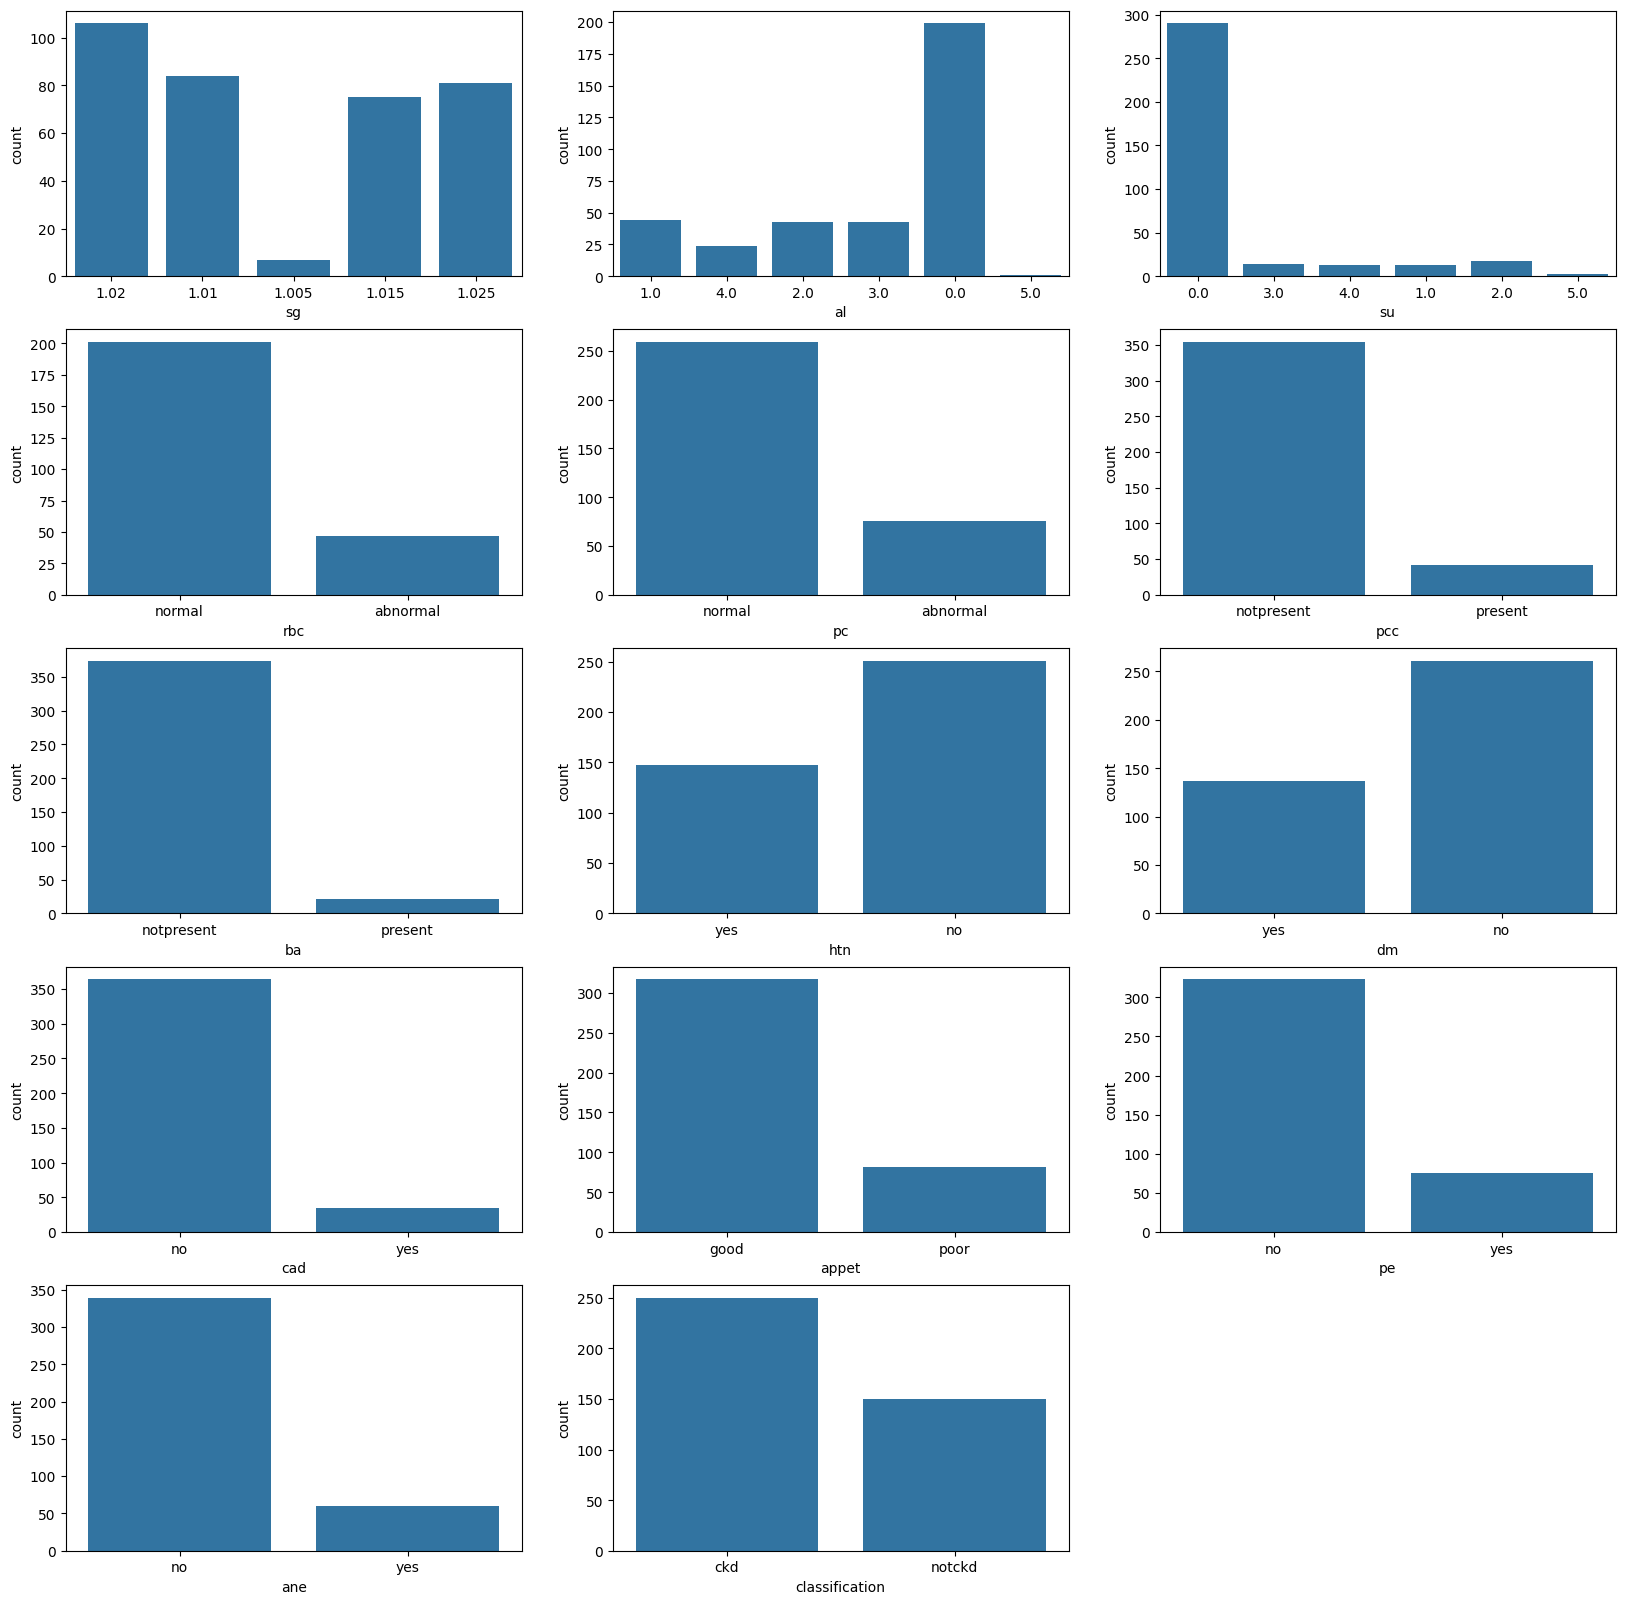

In [18]:
# Countplots for categorical features before imputation
plt.figure(figsize=(20,20))
for i,feature in enumerate(nominal):
  plt.subplot(5,3,i+1)
  sns.countplot(x =feature, data = ckd_data)
plt.show()

In [19]:
# Imputing nominal values with mode
ckd_data[nominal] = ckd_data[nominal].fillna(ckd_data[nominal].mode().iloc[0])
ckd_data.isnull().sum()

age                 9
bp                 12
sg                  0
al                  0
su                  0
rbc                 0
pc                  0
pcc                 0
ba                  0
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [20]:
# Imputing numerical values with median
ckd_data[numerical] = ckd_data[numerical].fillna(ckd_data[numerical].median().iloc[0])
ckd_data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [21]:
ckd_data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48,80.0,1.02,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50.0,1.02,4.0,0.0,normal,normal,notpresent,notpresent,55.0,...,38,6000,55.0,no,no,no,good,no,no,ckd
2,62,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,55.0,no,yes,no,poor,no,yes,ckd
3,48,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [22]:
ckd_data.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
395,55,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80.0,1.02,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,58,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [23]:
ckd_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,400.0,51.5625,16.982996,2.0,42.0,55.0,64.0,90.0
bp,400.0,75.825,13.966281,50.0,70.0,75.0,80.0,180.0
bgr,400.0,137.8025,80.261874,22.0,93.0,114.5,150.0,490.0
bu,400.0,57.3105,49.288595,1.5,27.0,44.0,61.75,391.0
sc,400.0,5.279375,11.897928,0.4,0.9,1.4,3.2125,76.0
sod,400.0,119.57875,35.310235,4.5,124.0,136.0,141.0,163.0
pot,400.0,15.70925,21.082286,2.5,4.0,4.7,5.825,55.0
hemo,400.0,18.048,14.557532,3.1,10.875,13.5,15.8,55.0
pcv,400.0,41.745,10.220132,9.0,34.0,42.0,51.25,55.0
wc,400.0,6193.075,4470.406582,55.0,55.0,6900.0,9400.0,26400.0


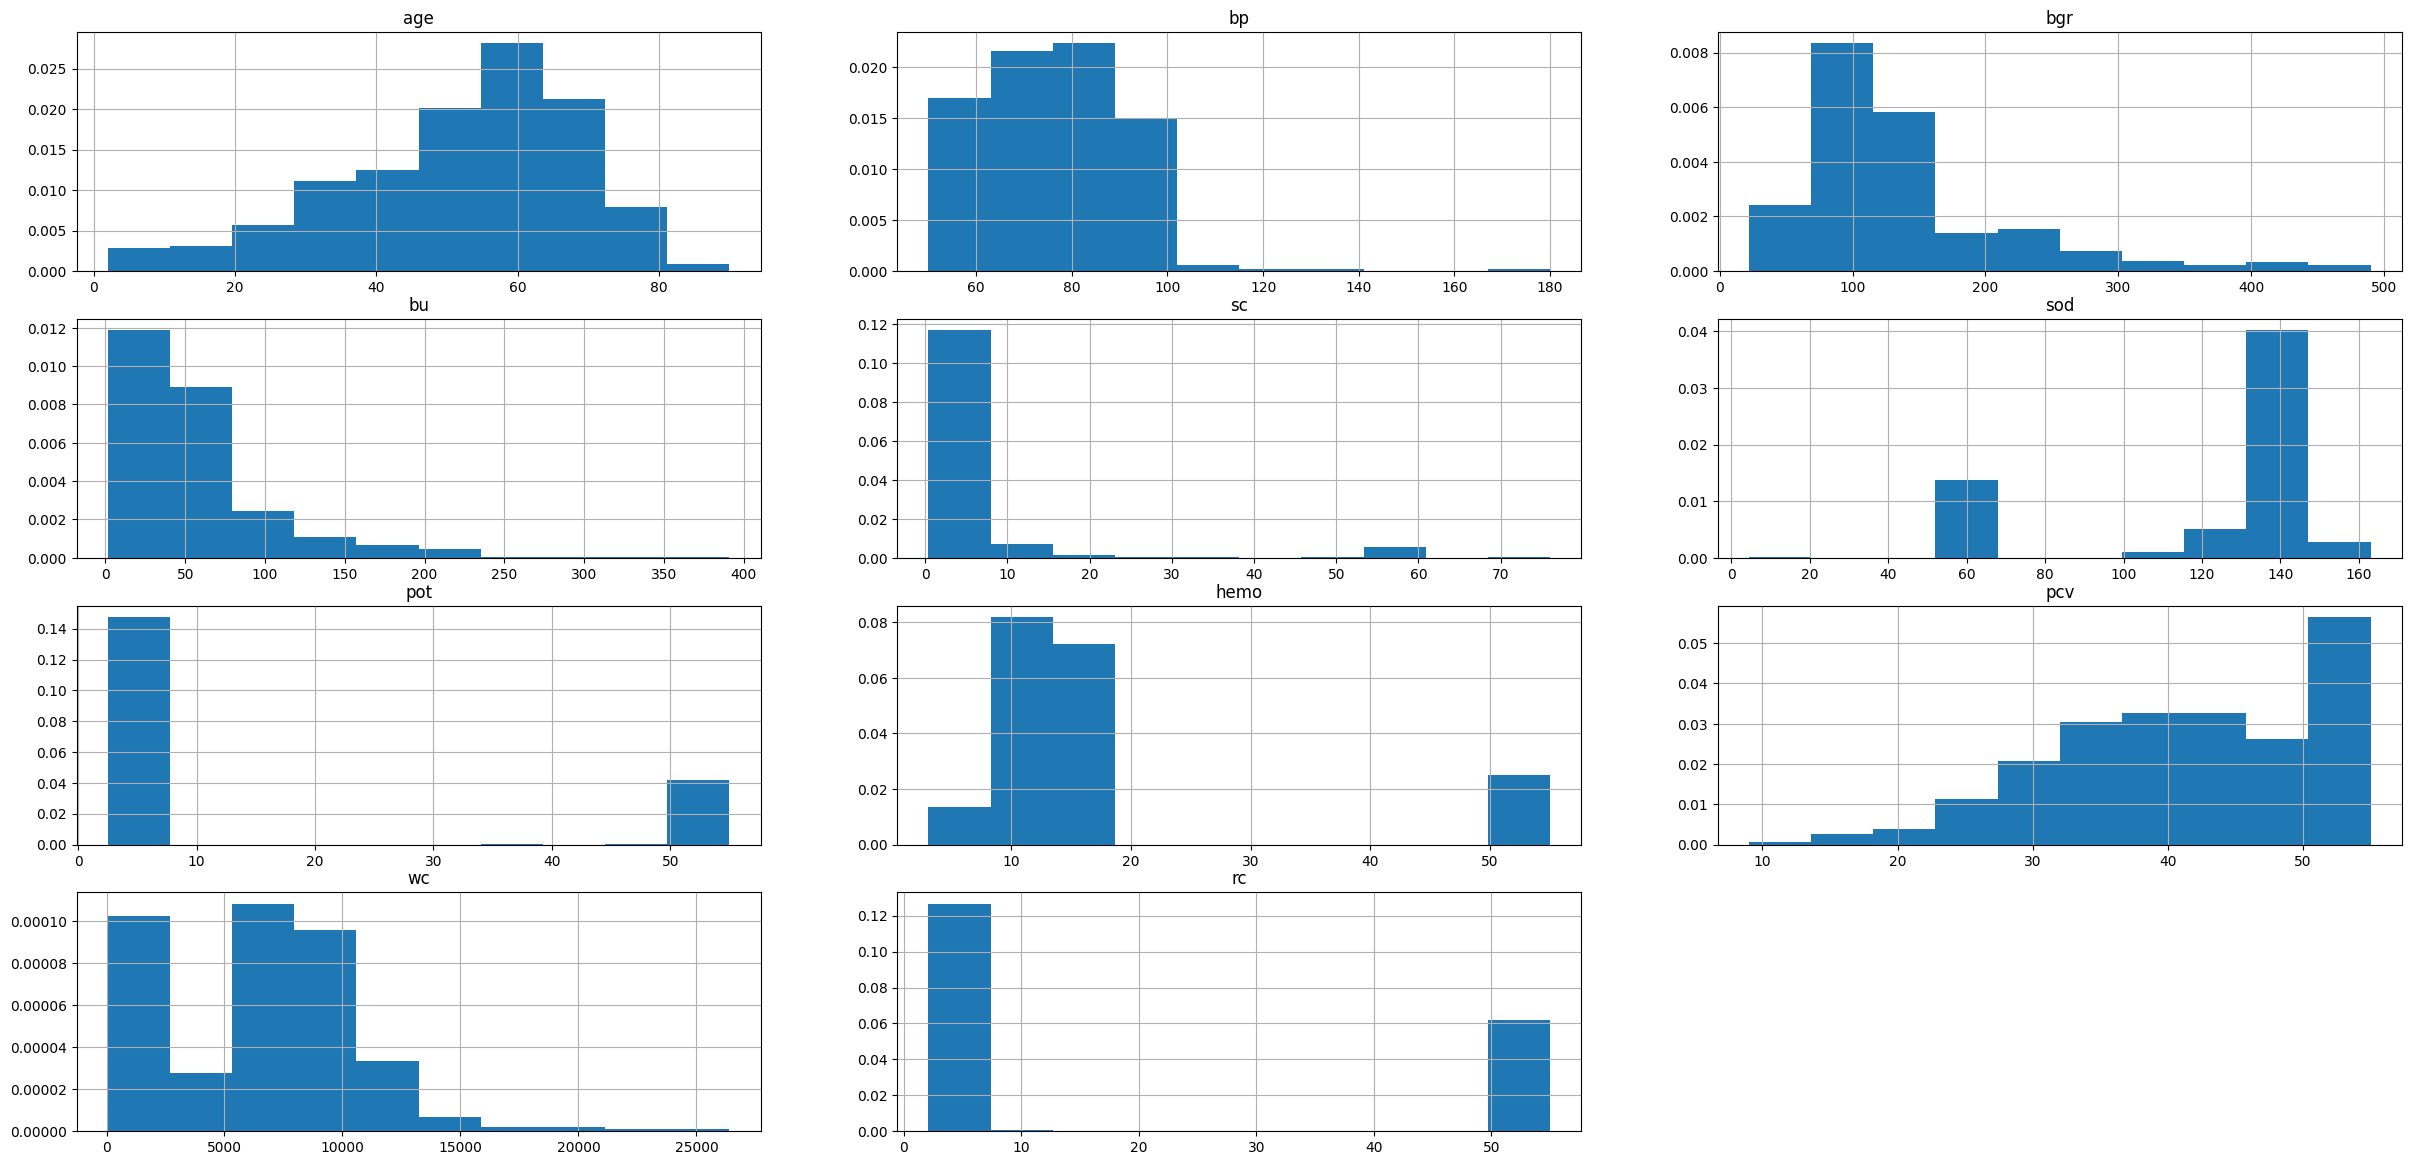

In [24]:
# Density Plots for numerical features after imputation
plt.figure(figsize=(30,18))
for id,col in enumerate(numerical):
  plt.subplot(5,3,id+1) # 5 rows & 3 columns
  ckd_data[col].hist(density = True)
  plt.title(col)

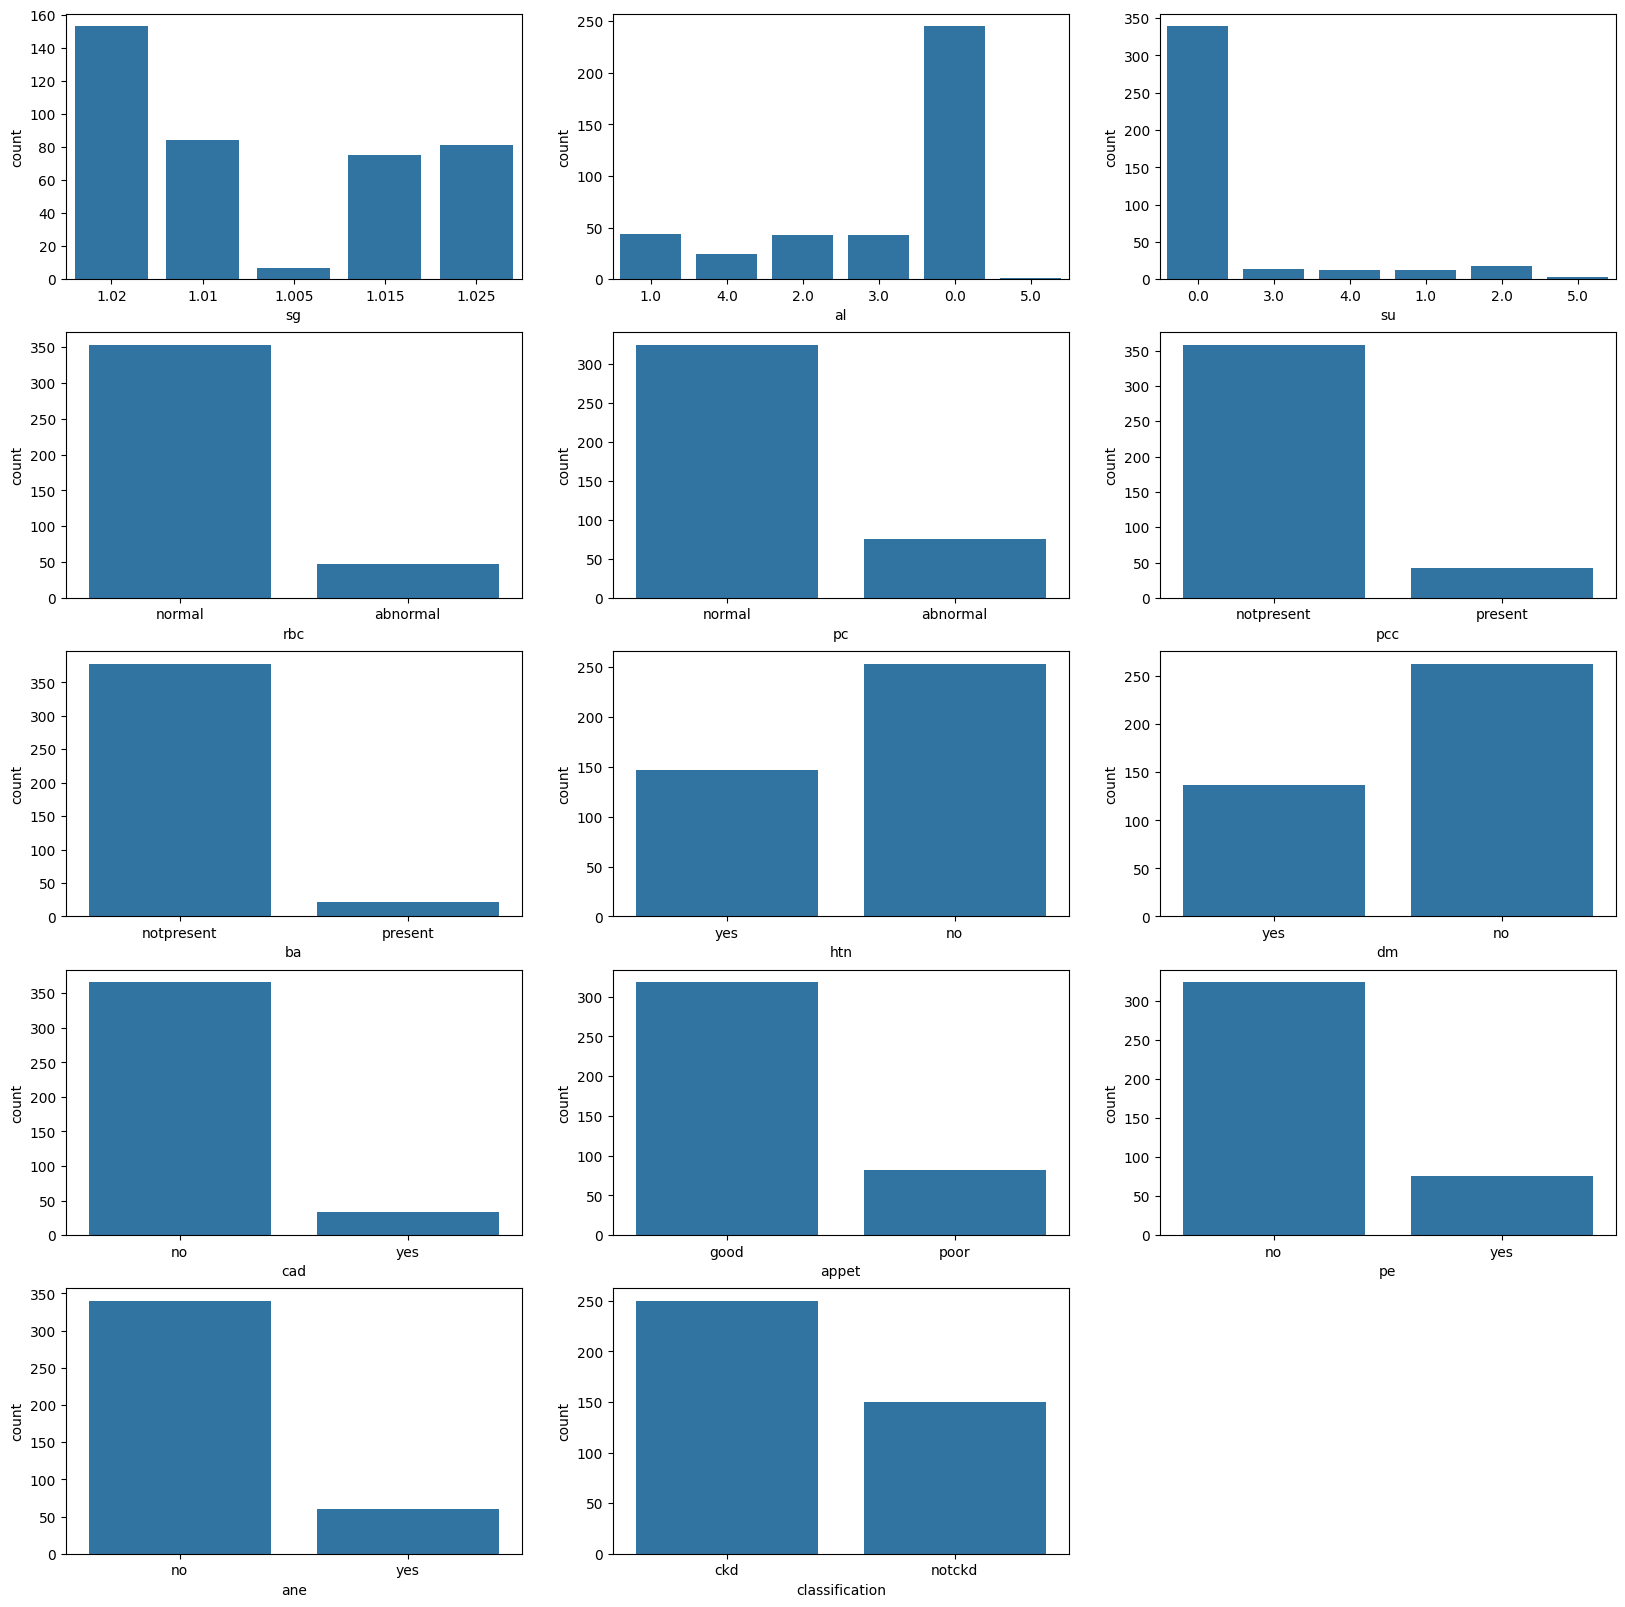

In [25]:
# Countplots for categorical features after imputation
plt.figure(figsize=(20,20))
for i,feature in enumerate(nominal):
  plt.subplot(5,3,i+1)
  sns.countplot(x =feature, data = ckd_data)
plt.show()

# 6. Visualizing Distribution & Correlation

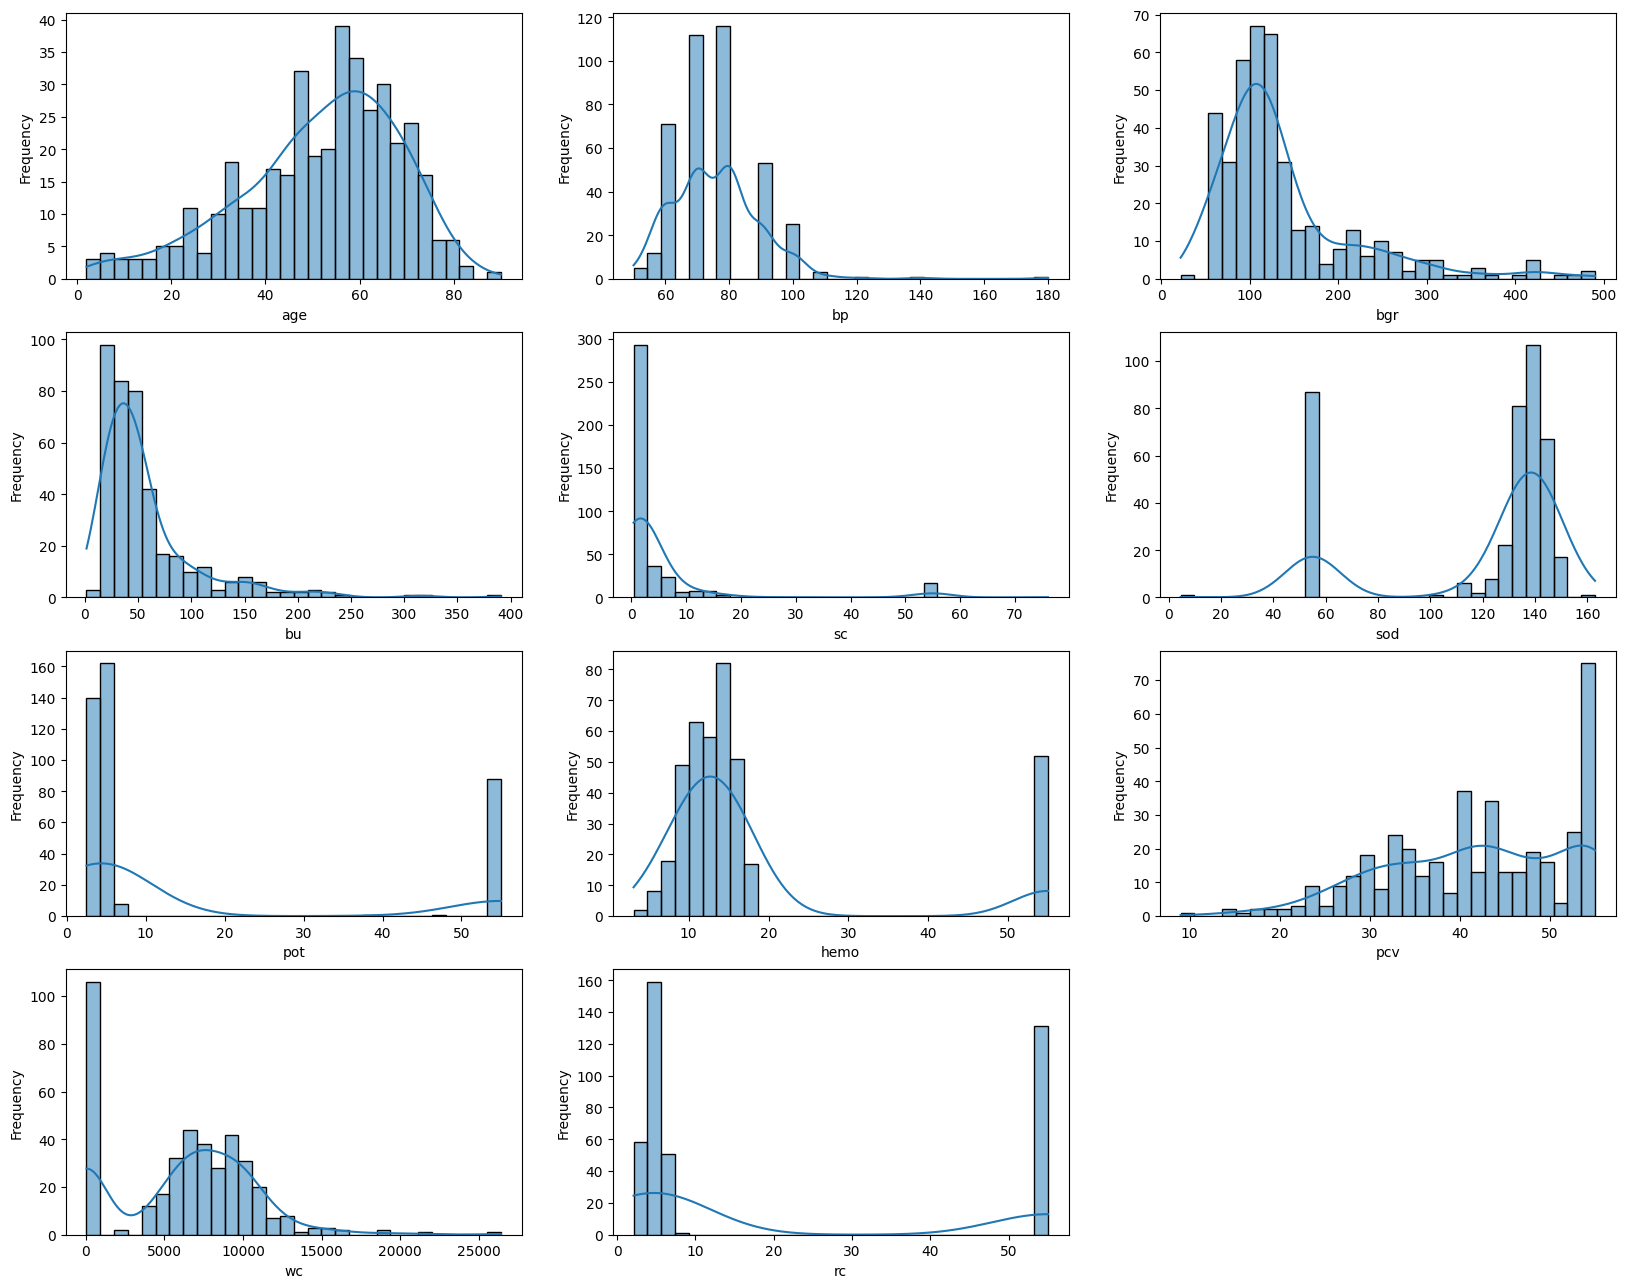

In [26]:
# Distribution Plot for Numerical Features

plt.figure(figsize=(20,20))
for i, num in enumerate(numerical):
  plt.subplot(5,3,i+1)
  sns.histplot(ckd_data[num], bins=30,kde = True, edgecolor='black')
  plt.xlabel(num)
  plt.ylabel('Frequency')

plt.show()

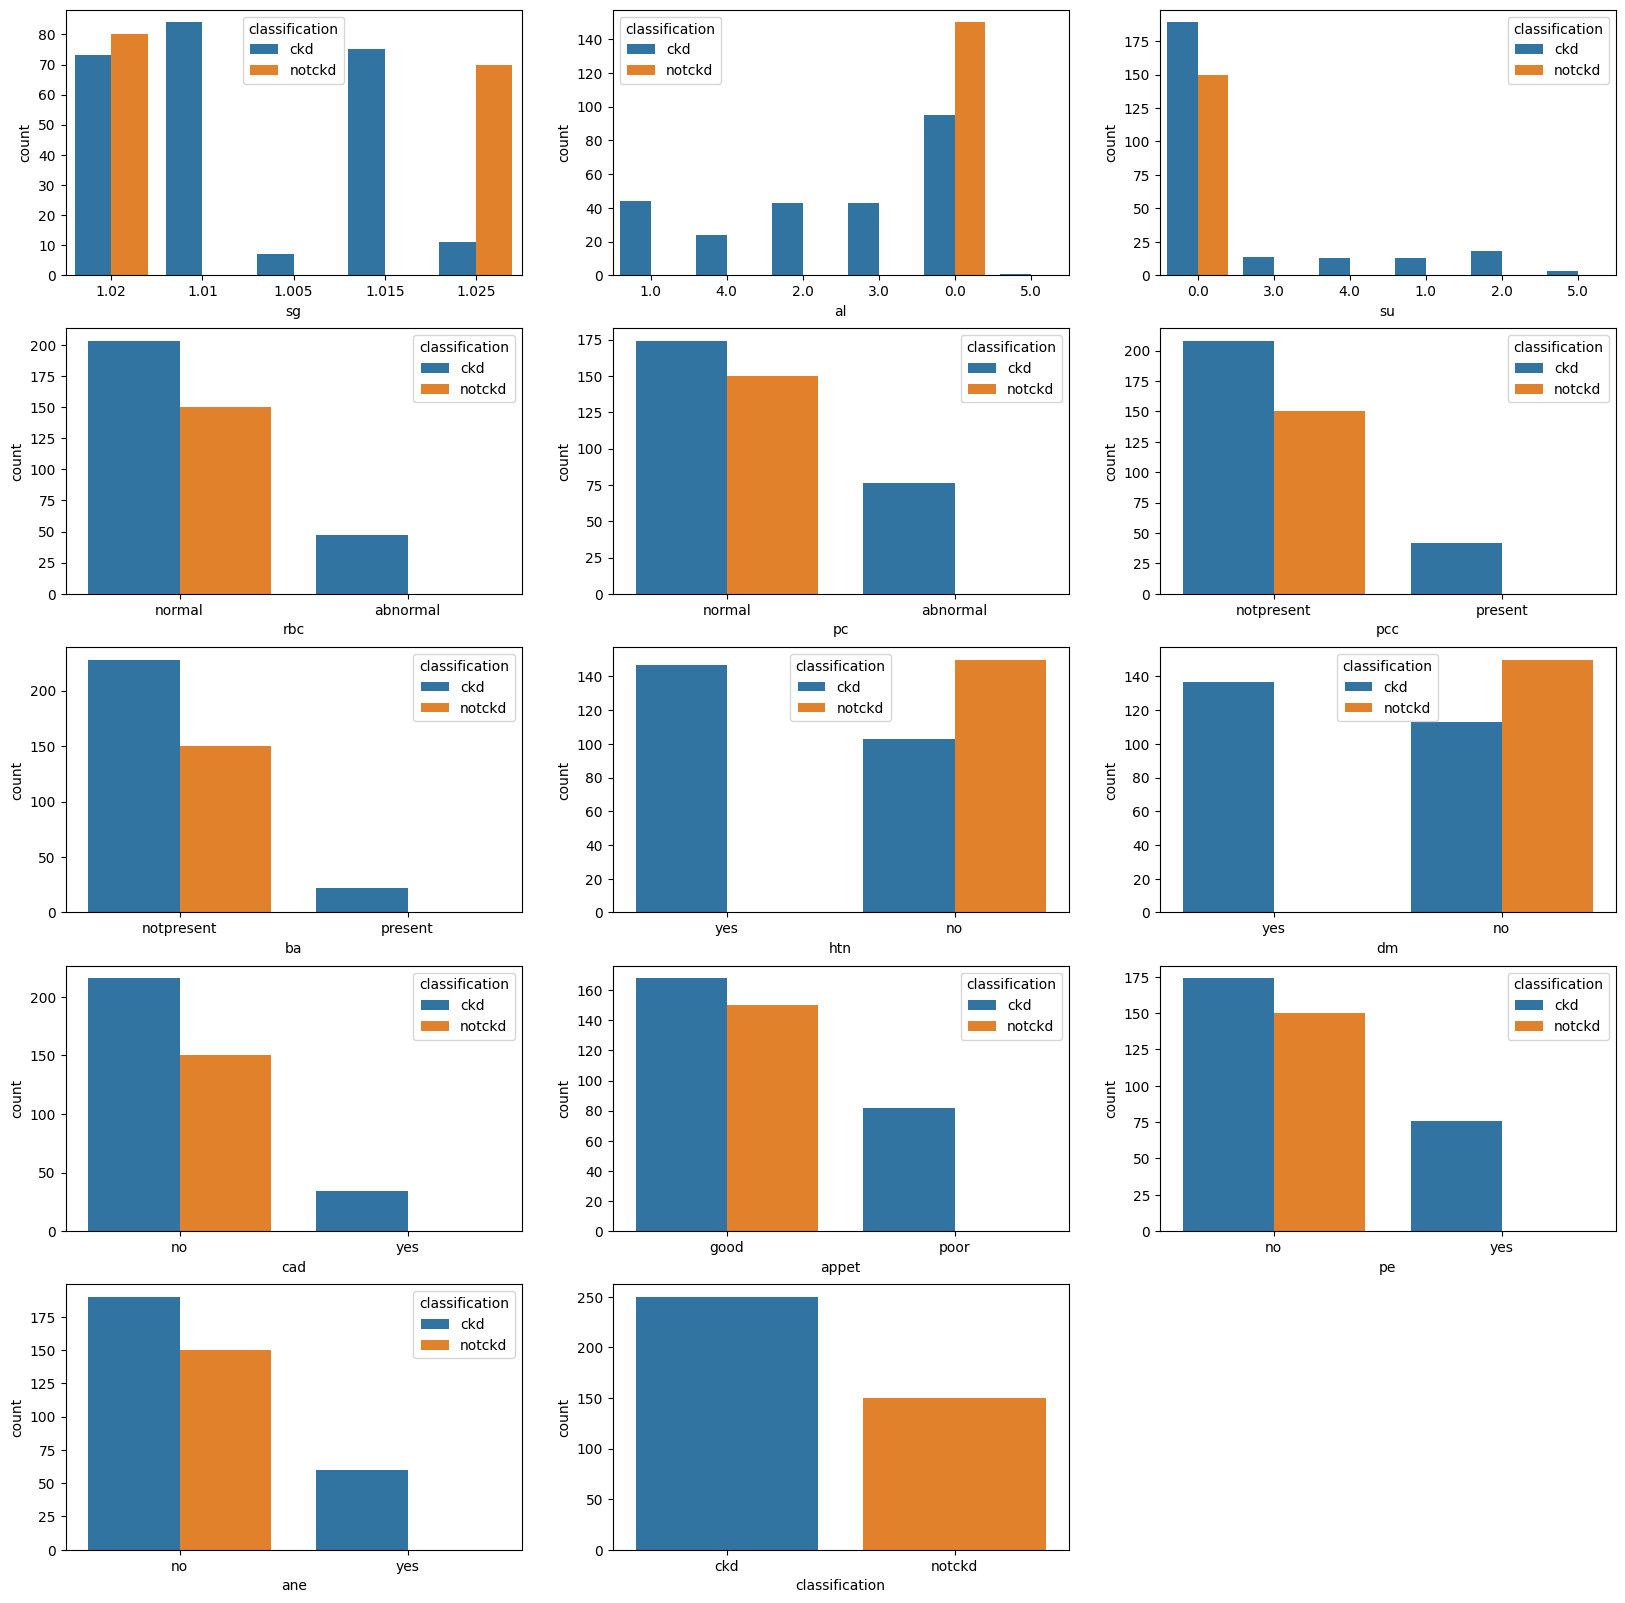

In [27]:
# Count plot for nominal Features

plt.figure(figsize=(20,20))
for i,feature in enumerate(nominal):
  plt.subplot(5,3,i+1)
  sns.countplot(x = feature, data = ckd_data,hue = "classification")
plt.show()

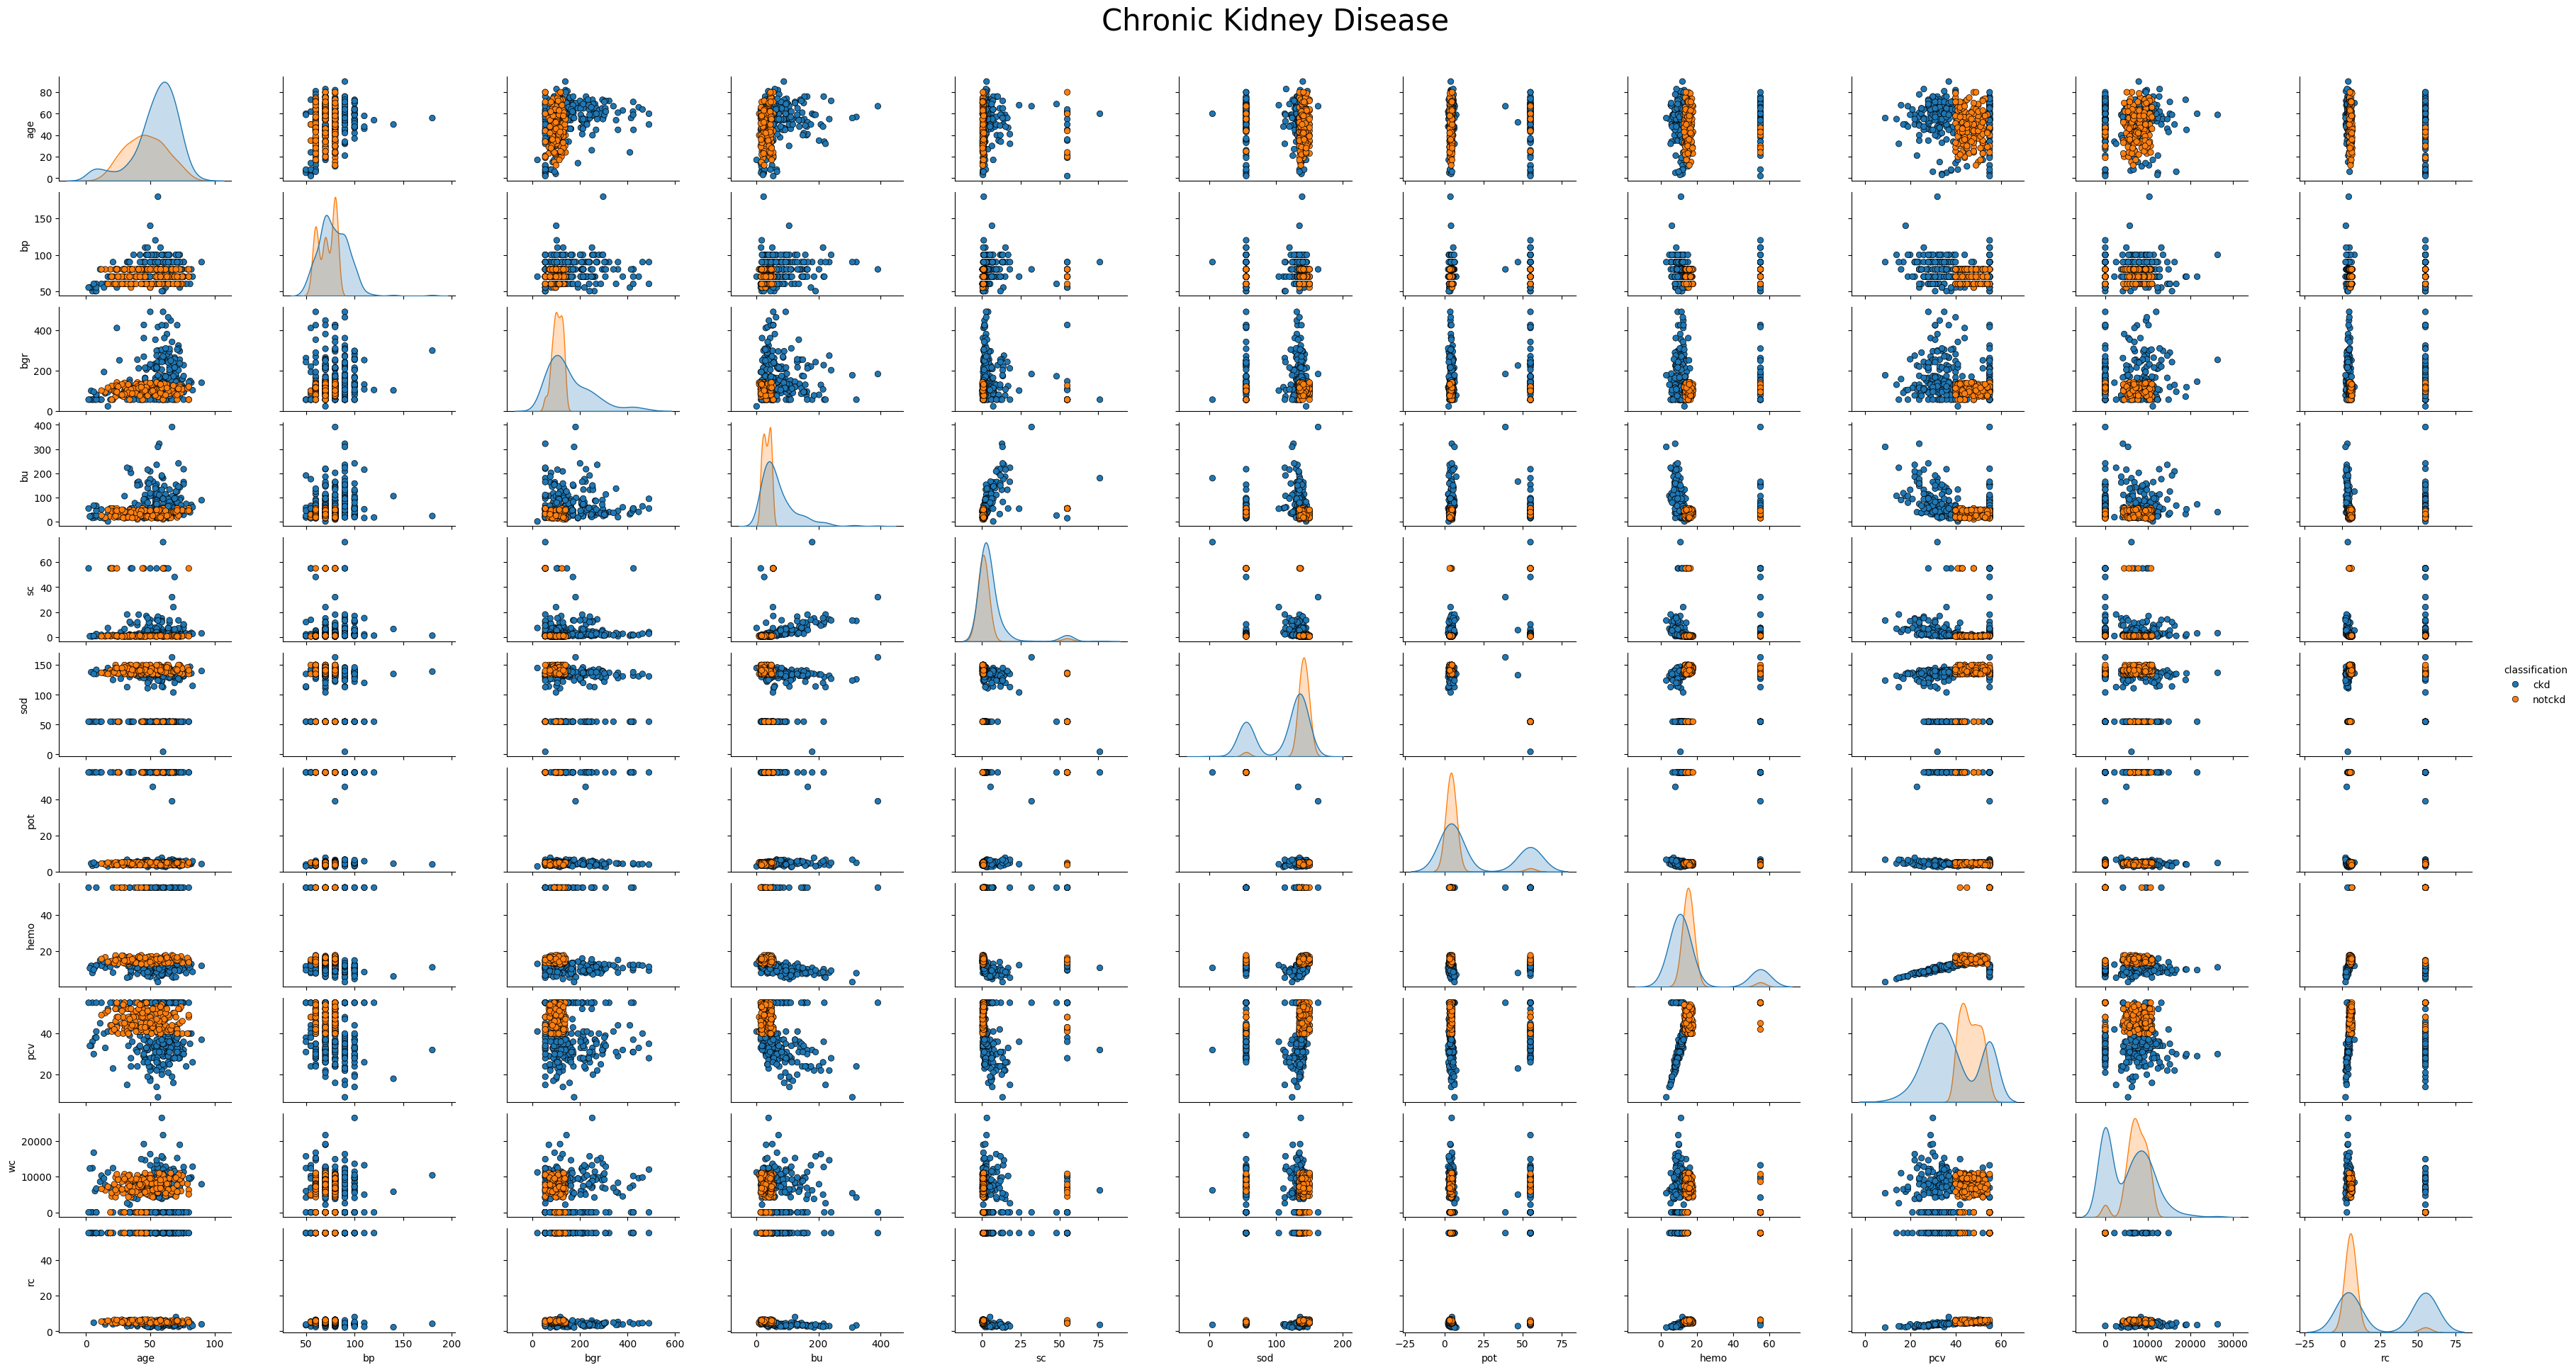

In [28]:
# Pair-plot
pairplot=sns.pairplot(ckd_data[['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wc','rc','classification']], hue='classification',
                height=1.8, aspect=1.8, plot_kws=dict(edgecolor='k', linewidth=0.5), diag_kind='kde', diag_kws=dict(fill=True))
fig = pairplot.fig
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Chronic Kidney Disease', fontsize=30)

It is observable from the generated pairplots that the maximum number of plots have some kind of linear relation, while others have non-linear relation. Therefore, it would be better to use the correlation heatmap to find the correlation percentage among the attributes.

In [29]:
# Correlation
ckd_corr = ckd_data.corr(numeric_only = True)
ckd_corr

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
age,1.000000,0.207943,0.257098,0.189858,-0.028903,-0.031474,0.018831,-0.019642,-0.155206,-0.013380,-0.038775
bp,0.207943,1.000000,0.147117,0.187479,0.037541,-0.062807,0.051080,-0.025040,-0.202992,-0.024406,-0.012604
bgr,0.257098,0.147117,1.000000,0.091074,-0.090733,-0.039990,0.021045,-0.023308,-0.191262,0.043748,-0.013682
bu,0.189858,0.187479,0.091074,1.000000,0.256685,0.019004,-0.041334,-0.089831,-0.385141,-0.022269,0.008471
sc,-0.028903,0.037541,-0.090733,0.256685,1.000000,-0.321686,0.296574,0.126291,-0.001255,-0.123116,0.153149
sod,-0.031474,-0.062807,-0.039990,0.019004,-0.321686,1.000000,-0.969990,-0.136211,-0.009070,0.201613,-0.364447
pot,0.018831,0.051080,0.021045,-0.041334,0.296574,-0.969990,1.000000,0.156720,0.064307,-0.208026,0.361958
hemo,-0.019642,-0.025040,-0.023308,-0.089831,0.126291,-0.136211,0.156720,1.000000,0.588926,-0.412982,0.434782
pcv,-0.155206,-0.202992,-0.191262,-0.385141,-0.001255,-0.009070,0.064307,0.588926,1.000000,-0.317496,0.243662
wc,-0.013380,-0.024406,0.043748,-0.022269,-0.123116,0.201613,-0.208026,-0.412982,-0.317496,1.000000,-0.710270


<Axes: >

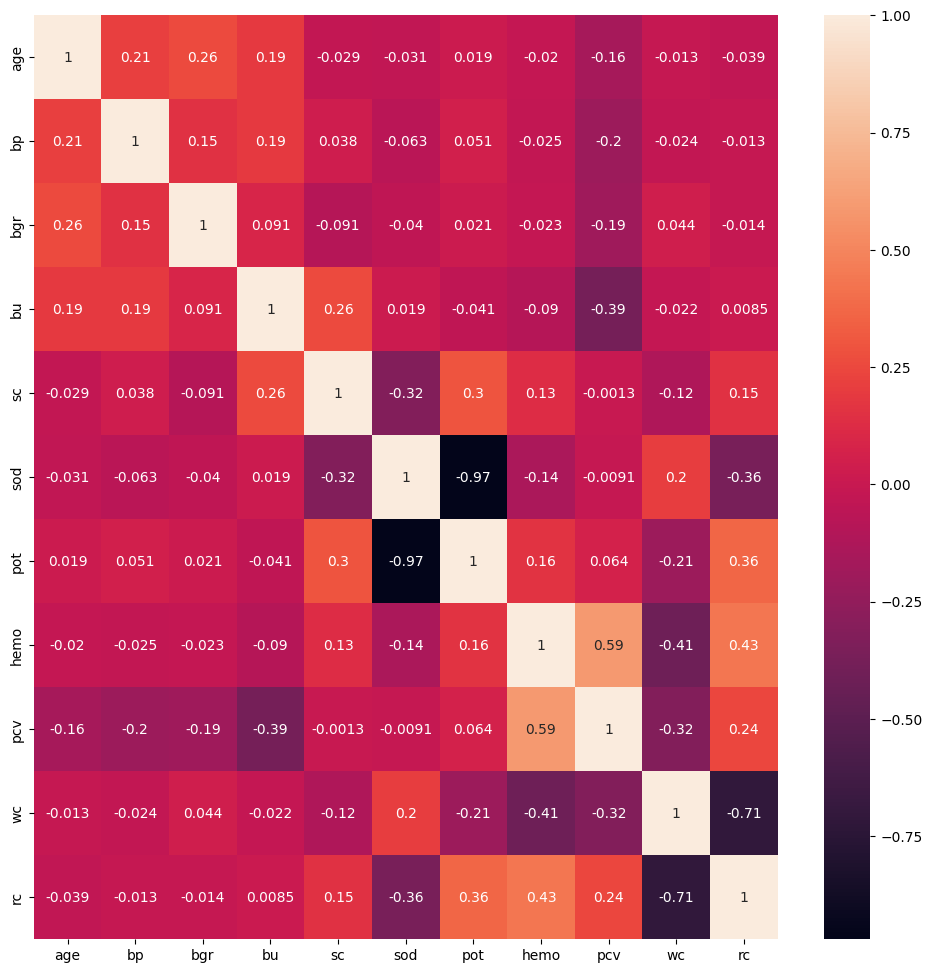

In [30]:
# Correlation matrix heat-map
plt.figure(figsize=(12,12))
sns.heatmap(ckd_corr,cbar=True,annot=True)

*   Rc is positively correlated with hemo,pcv
*   pcv is negatively correlated with bu
*   pcv and hemo are highly positive correlated








# 7. Label Encoding

In [31]:
# Label Encoding to convert nominal to numerical values
le = LabelEncoder()

In [32]:
# Checking number of unique values in each nominal features
for col in nominal:
    print(f'{col} has {ckd_data[col].nunique()} : {ckd_data[col].unique()} unique values')

sg has 5 : ['1.02' '1.01' '1.005' '1.015' '1.025'] unique values
al has 6 : ['1.0' '4.0' '2.0' '3.0' '0.0' '5.0'] unique values
su has 6 : ['0.0' '3.0' '4.0' '1.0' '2.0' '5.0'] unique values
rbc has 2 : ['normal' 'abnormal'] unique values
pc has 2 : ['normal' 'abnormal'] unique values
pcc has 2 : ['notpresent' 'present'] unique values
ba has 2 : ['notpresent' 'present'] unique values
htn has 2 : ['yes' 'no'] unique values
dm has 2 : ['yes' 'no'] unique values
cad has 2 : ['no' 'yes'] unique values
appet has 2 : ['good' 'poor'] unique values
pe has 2 : ['no' 'yes'] unique values
ane has 2 : ['no' 'yes'] unique values
classification has 2 : ['ckd' 'notckd'] unique values


In [33]:
for col in nominal:
  ckd_data[col] = le.fit_transform(ckd_data[col])

In [34]:
# Checking number of unique values in each nominal features
for col in nominal:
    print(f'{col} has {ckd_data[col].nunique()} : {ckd_data[col].unique()} unique values')

sg has 5 : [3 1 0 2 4] unique values
al has 6 : [1 4 2 3 0 5] unique values
su has 6 : [0 3 4 1 2 5] unique values
rbc has 2 : [1 0] unique values
pc has 2 : [1 0] unique values
pcc has 2 : [0 1] unique values
ba has 2 : [0 1] unique values
htn has 2 : [1 0] unique values
dm has 2 : [1 0] unique values
cad has 2 : [0 1] unique values
appet has 2 : [0 1] unique values
pe has 2 : [0 1] unique values
ane has 2 : [0 1] unique values
classification has 2 : [0 1] unique values


In [35]:
ckd_data.dtypes

age                 Int64
bp                float64
sg                  int32
al                  int32
su                  int32
rbc                 int32
pc                  int32
pcc                 int32
ba                  int32
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                 Int64
wc                  Int64
rc                float64
htn                 int32
dm                  int32
cad                 int32
appet               int32
pe                  int32
ane                 int32
classification      int32
dtype: object

# 8. Splitting data and Standardisation

In [36]:
# Separating features and target
X = ckd_data.drop('classification',axis=1)
Y = ckd_data['classification']

In [37]:
# Standardization
sscaler = StandardScaler()
features = sscaler.fit_transform(X)
features

array([[-0.21003135,  0.29930863,  0.4214856 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-2.62723421, -1.85141206,  0.4214856 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.615355  ,  0.29930863, -1.4210744 , ...,  1.96927621,
        -0.4843221 ,  2.38047614],
       ...,
       [-2.33245337,  0.29930863,  0.4214856 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-2.03767254, -1.13450516,  1.3427656 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.37953033,  0.29930863,  1.3427656 , ..., -0.50780078,
        -0.4843221 , -0.42008403]])

In [38]:
# Splitting data in 70-30 manner
X_train, X_test, Y_train, Y_test = train_test_split(features,Y,test_size = 0.3, random_state = 3,stratify = Y)

In [39]:
print(X_train.shape,X_test.shape)

(280, 24) (120, 24)


In [40]:
print(Y_train.shape,Y_test.shape)

(280,) (120,)


In [41]:
# Checking whether data is balanced or not
print("Train : ",len(Y_train[Y_train==1]), len(Y_train[Y_train==0]),Y_train.shape)
print("Test : ",len(Y_test[Y_test==1]), len(Y_test[Y_test==0]),Y_test.shape)

Train :  105 175 (280,)
Test :  45 75 (120,)


In [42]:
X_train.shape[1:]

(24,)

# 9. Model Training

In [43]:
# Define custom RBM layer serializable
@tf.keras.utils.register_keras_serializable()
class RBMLayer(tf.keras.layers.Layer):
    def __init__(self, units, name = None, **kwargs):
        super(RBMLayer, self).__init__(**kwargs)
        self.units = units

    def build(self, input_shape):
        # Random Weight Initialization
        self.W = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='random_normal',
                                 trainable=True)
        super(RBMLayer, self).build(input_shape)

    def call(self, inputs):
        # Result Matrix
        return tf.nn.sigmoid(tf.matmul(inputs, self.W) + self.b)

    def get_config(self):
        config = super(RBMLayer, self).get_config()
        config.update({
            'units': self.units,
        })
        return config

In [44]:
# RBM Pre-Training
rbm1 = RBMLayer(units=24,name = 'rbm1')
rbm2 = RBMLayer(units=13,name = 'rbm2')
rbm3 = RBMLayer(units=28,name = 'rbm3')
rbm4 = RBMLayer(units=8,name = 'rbm4')
rbm5 = RBMLayer(units=4,name = 'rbm5')

In [45]:
# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(Y_train)
y_test_one_hot = tf.keras.utils.to_categorical(Y_test)

In [46]:
# Define the final classification layer with Softmax as activation function
logistic = layers.Dense(units=2, activation='softmax',name = 'logistic')

In [47]:
# Create the Deep Belief Network model

model = Sequential([
    layers.Input(shape=X_train.shape[1:]),  # Input layer
    layers.BatchNormalization(),            # Batch normalization
    layers.Dropout(0.2),                    # Dropout layer
    rbm1,                                   # Stacked RBM layer - 1
    rbm2,                                   # Stacked RBM layer - 2
    rbm3,                                   # Stacked RBM layer - 3
    rbm4,                                   # Stacked RBM layer - 4
    rbm5,                                   # Stacked RBM layer - 5
    logistic                                # Final classification layer
])

In [48]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Loss function : Categorical Cross Entropy
              metrics=['accuracy'])             # Accuracy as metrics

In [62]:
# To prevent overfitting
class StopOnPoint(tf.keras.callbacks.Callback):
    def __init__(self, point):
        super(StopOnPoint, self).__init__()
        self.point = point

    def on_epoch_end(self, epoch, logs=None):
        val_accuracy = logs["val_accuracy"]
        accuracy = logs["accuracy"]
        if accuracy >= self.point and val_accuracy >= self.point:
            self.model.stop_training = True

In [65]:
# Train the model
model.fit(X_train, y_train_one_hot, epochs=400, batch_size=32, validation_data=(X_test, y_test_one_hot),callbacks = [StopOnPoint(0.983)])

Epoch 1/400
9/9 [==============================] - 0s 17ms/step - loss: 0.0680 - accuracy: 0.9857 - val_loss: 0.0843 - val_accuracy: 0.9750
Epoch 2/400
9/9 [==============================] - 0s 9ms/step - loss: 0.1876 - accuracy: 0.9393 - val_loss: 0.0857 - val_accuracy: 0.9750
Epoch 3/400
9/9 [==============================] - 0s 9ms/step - loss: 0.0758 - accuracy: 0.9786 - val_loss: 0.0850 - val_accuracy: 0.9750
Epoch 4/400
9/9 [==============================] - 0s 8ms/step - loss: 0.0836 - accuracy: 0.9679 - val_loss: 0.0858 - val_accuracy: 0.9750
Epoch 5/400
9/9 [==============================] - 0s 7ms/step - loss: 0.0581 - accuracy: 0.9893 - val_loss: 0.0850 - val_accuracy: 0.9750
Epoch 6/400
9/9 [==============================] - 0s 8ms/step - loss: 0.0637 - accuracy: 0.9821 - val_loss: 0.0841 - val_accuracy: 0.9750
Epoch 7/400
9/9 [==============================] - 0s 7ms/step - loss: 0.0600 - accuracy: 0.9857 - val_loss: 0.0845 - val_accuracy: 0.9750
Epoch 8/400
9/9 [=========

# 10. Model Evaluation

In [66]:
# Evaluate the model - train
train_loss, train_accuracy = model.evaluate(X_train, y_train_one_hot)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy*100}")

9/9 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9964
Train Loss: 0.02215234562754631
Train Accuracy: 99.64285492897034


In [67]:
# Evaluate the model - test
test_loss, test_accuracy = model.evaluate(X_test, y_test_one_hot)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy*100}")

4/4 [==============================] - 0s 3ms/step - loss: 0.0751 - accuracy: 0.9833
Test Loss: 0.07506215572357178
Test Accuracy: 98.33333492279053


9/9 [==============================] - 0s 3ms/step


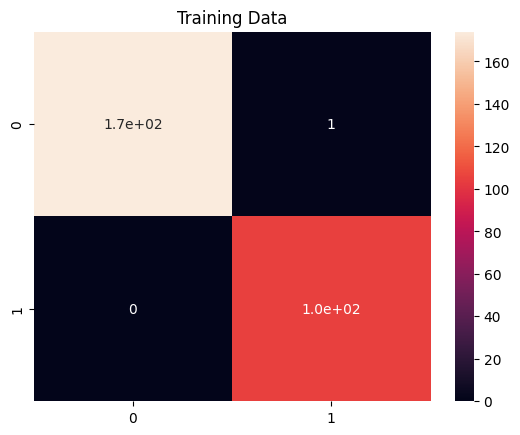

In [68]:
# Confusion Matrix - Train Dataset
pred = model.predict(X_train)
predictions_train = []
for arr in pred:
    if arr[0] > arr[1]:
        predictions_train.append(0)
    else:
        predictions_train.append(1)
predictions_train = np.array(predictions_train)
predicted_labels = predictions_train
true_labels_train = Y_train.values.flatten()
cm_train = confusion_matrix(true_labels_train,predictions_train)
sns.heatmap(cm_train,annot = True)
plt.title("Training Data")
plt.show()

4/4 [==============================] - 0s 4ms/step


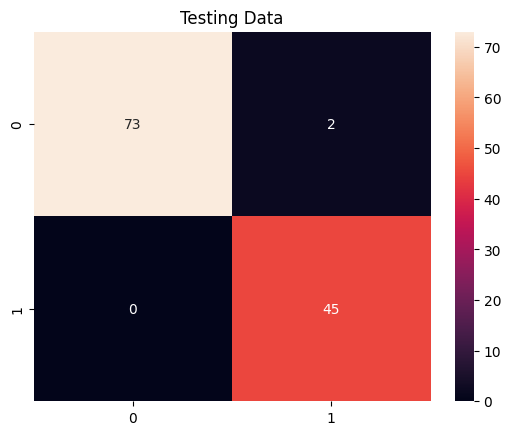

In [69]:
# Confusion Matrix - Train Dataset
pred = model.predict(X_test)
predictions_test = []
for arr in pred:
    if arr[0] > arr[1]:
        predictions_test.append(0+)
    else:
        predictions_test.append(1)
predictions_test = np.array(predictions_test)
predicted_lest = predictions_test
true_labels_test = Y_test.values.flatten()
cm_test = confusion_matrix(true_labels_test,predictions_test)
sns.heatmap(cm_test,annot = True)
plt.title("Testing Data")
plt.show()

In [70]:
# Classification Report - Train
print("Train Dataset")
print(classification_report(true_labels_train,predictions_train))

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       175
           1       0.99      1.00      1.00       105

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



In [71]:
# Classification Report - Test
print("Test Dataset")
print(classification_report(true_labels_test,predictions_test))

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.96      1.00      0.98        45

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120



In [72]:
# Training Model
print("Training Data ...")
print("Precision : ",precision_score(true_labels_train,predictions_train)*100," %")
print("Recall : ",recall_score(true_labels_train,predictions_train)*100, " %")
print("F1 : ",f1_score(true_labels_train,predictions_train)*100, " %")

Training Data ...
Precision :  99.05660377358491  %
Recall :  100.0  %
F1 :  99.5260663507109  %


In [73]:
# Testing Model
print("Testing Data ...")
print("Precision : ",precision_score(true_labels_test,predictions_test)*100, " %")
print("Recall : ",recall_score(true_labels_test,predictions_test)*100, " %")
print("F1 : ",f1_score(true_labels_test,predictions_test)*100, " %")

Testing Data ...
Precision :  95.74468085106383  %
Recall :  100.0  %
F1 :  97.82608695652173  %


# 11. Saving the models

In [59]:
#Saving the custom sequential model

for i, layer in enumerate(model.layers):
    # Weights for the current layer
    weights = layer.get_weights()
    # Looping for the current layer
    for j, weight in enumerate(weights):
        # Save weight matrix W
        np.save(f'layer_{i}_weights_{j}_W.npy', weight[0])
        # Save bias vector b
        np.save(f'layer_{i}_weights_{j}_b.npy', weight[1])

In [60]:
# Save StandardScaler
dump(sscaler, 'scaler.pkl')

['scaler.pkl']

In [61]:
# Save LabelEncoder
dump(le, 'label_encoder.pkl')

['label_encoder.pkl']